In [29]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=6df4d3d1cc815436c7f1c0b3028310b47e043e7d7c0757ab3547a7895d3148a3
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from sklearn.metrics import silhouette_score

In [15]:

data = pd.read_csv('/content/data_banknote_authentication.txt', delimiter =' ')
print(data.head())

   3.6216,8.6661,-2.8073,-0.44699,0
0   4.5459,8.1674,-2.4586,-1.4621,0
1    3.866,-2.6383,1.9242,0.10645,0
2   3.4566,9.5228,-4.0112,-3.5944,0
3  0.32924,-4.4552,4.5718,-0.9888,0
4   4.3684,9.6718,-3.9606,-3.1625,0


       Column1   Column2   Column3   Column4
0     0.769004  0.839643  0.106783  0.736628
1     0.835659  0.820982  0.121804  0.644326
2     0.786629  0.416648  0.310608  0.786951
3     0.757105  0.871699  0.054921  0.450440
4     0.531578  0.348662  0.424662  0.687362
...        ...       ...       ...       ...
1367  0.537124  0.565855  0.165249  0.726398
1368  0.407690  0.332868  0.506753  0.808350
1369  0.237385  0.011768  0.985603  0.524755
1370  0.250842  0.201701  0.761587  0.660675
1371  0.324528  0.490747  0.343348  0.885949

[1372 rows x 4 columns]


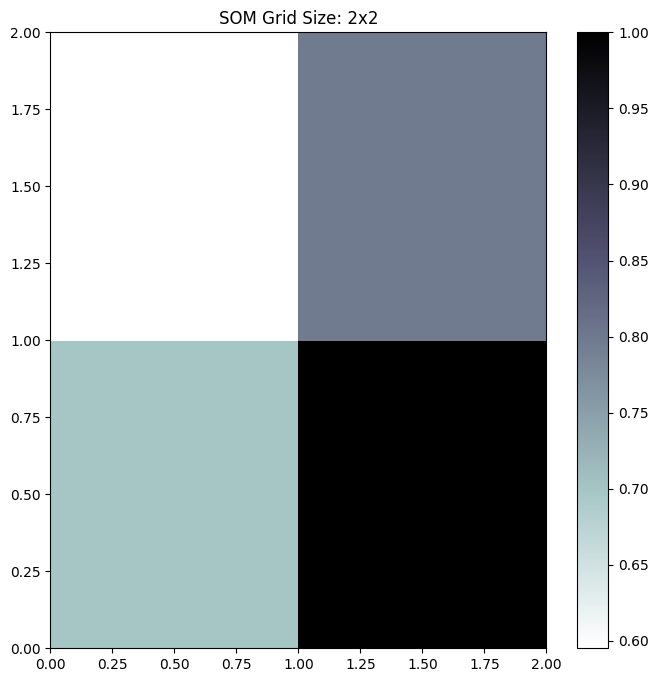

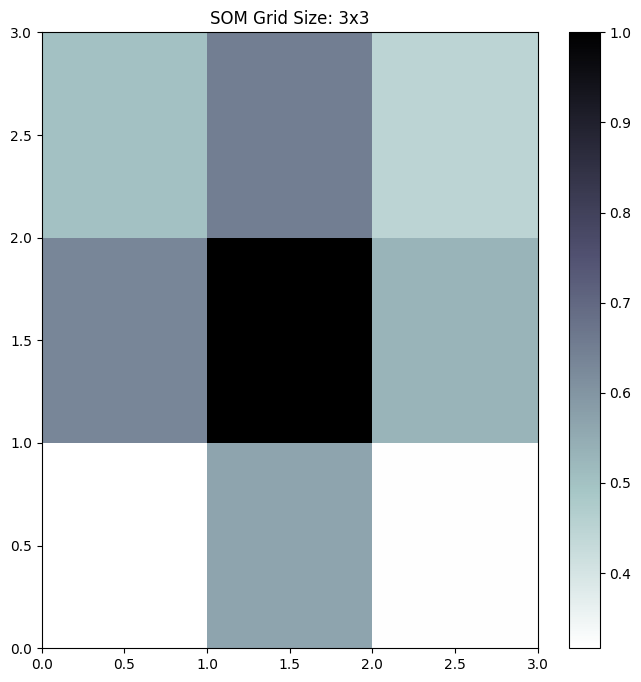

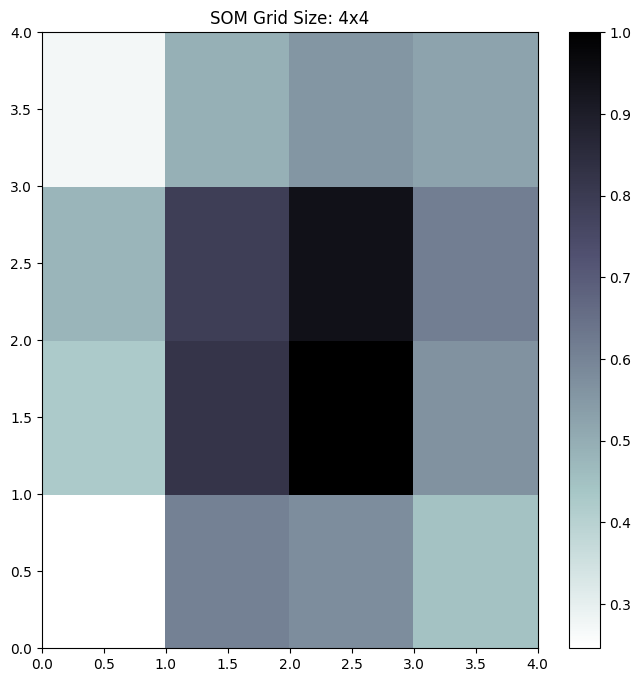

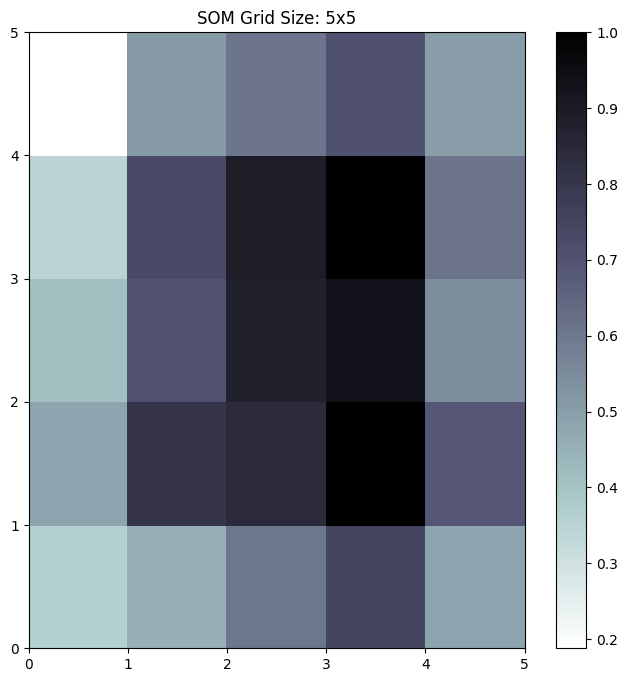

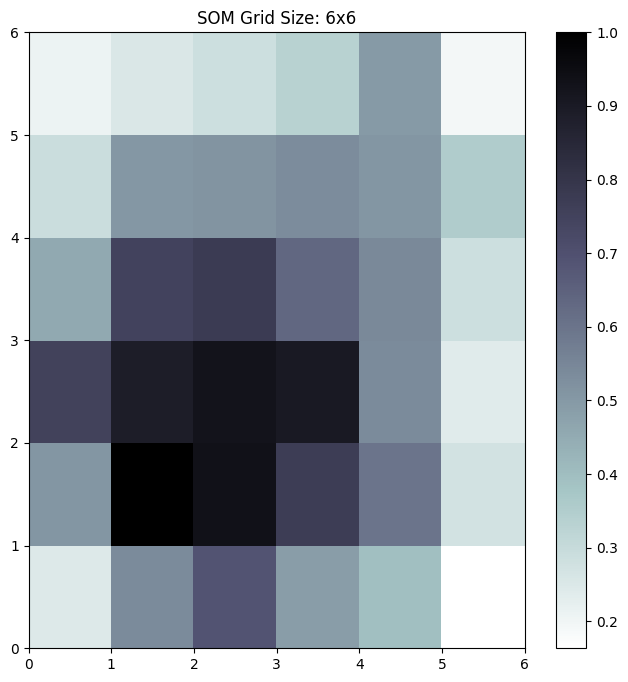

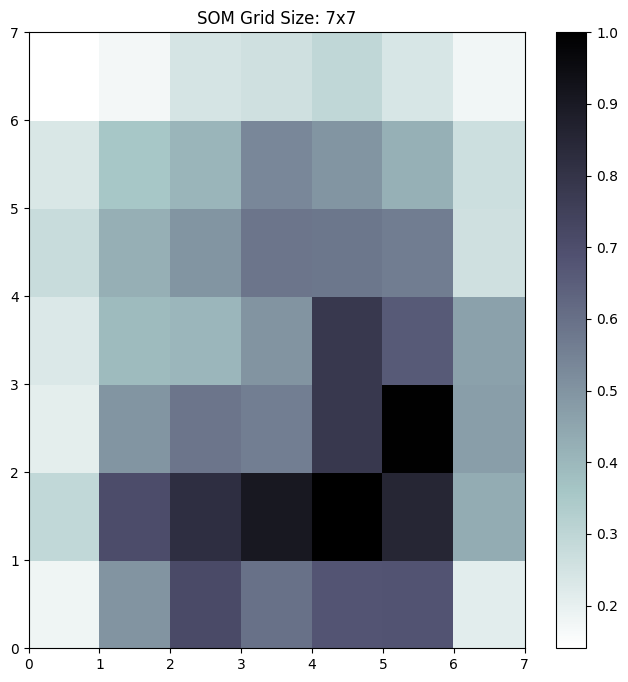

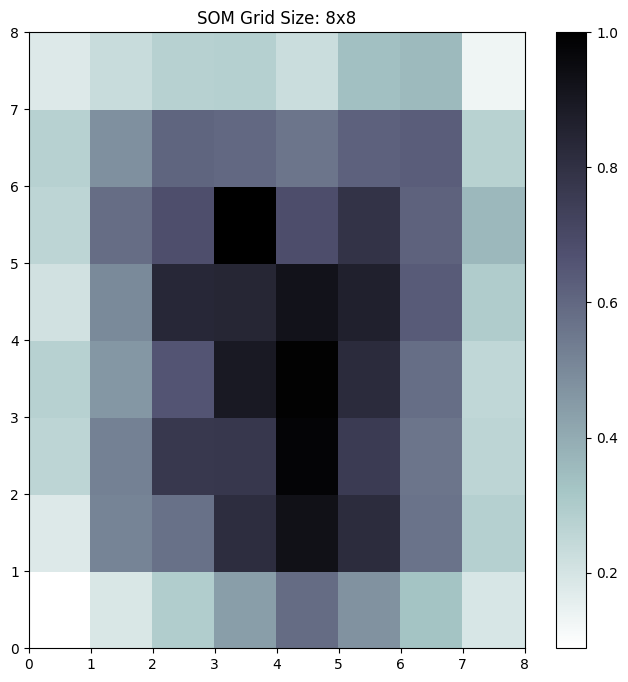

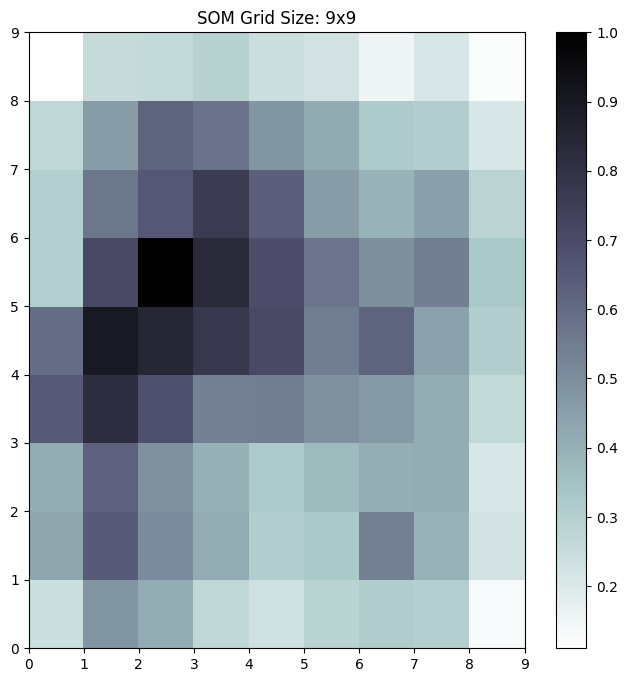

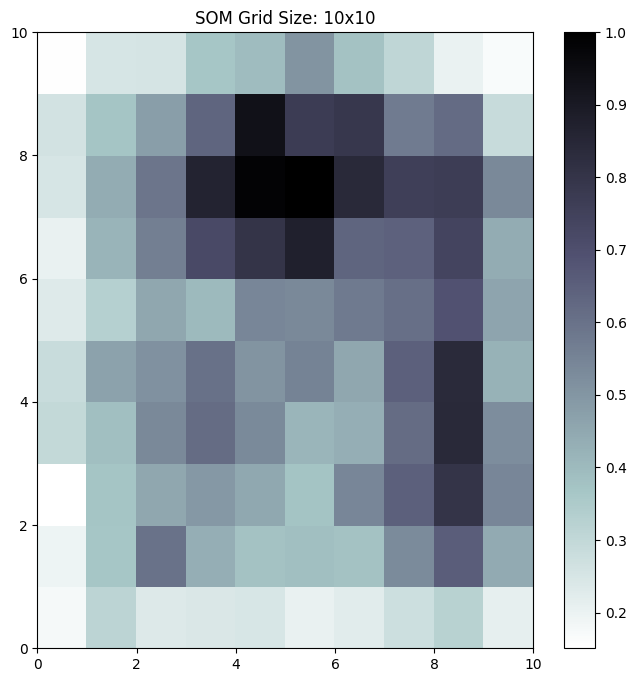

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/data_banknote_authentication.txt', header=None, names=['Column1', 'Column2', 'Column3', 'Column4', 'Column5'])

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data[['Column1', 'Column2', 'Column3', 'Column4']] = scaler.fit_transform(data[['Column1', 'Column2', 'Column3', 'Column4']])

# Drop the fifth column
data = data.drop('Column5', axis=1)

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Print the normalized data
print(data)
# Define a range of grid sizes to experiment with
grid_sizes = [(2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]


# Visualize SOM maps for each grid size
for som_dim in grid_sizes:
    som = MiniSom(som_dim[0], som_dim[1], input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5)
    som.random_weights_init(X_train)
    num_epochs = 1000
    som.train_random(X_train, num_epochs)

    plt.figure(figsize=(8, 8))
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()
    plt.title(f'SOM Grid Size: {som_dim[0]}x{som_dim[1]}')
    plt.show()